# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print data.mean(axis=0)
print data.std(axis=0)

from sklearn import preprocessing
data_scaled = preprocessing.scale(data)
print data_scaled.mean(axis=0)
print data_scaled.std(axis=0)

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64
[ -4.89507424e-17  -2.90171927e-17  -6.18192366e-17   1.21115239e-17
   1.23638473e-17  -9.61352210e-17]
[ 1.  1.  1.  1.  1.  1.]


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: This wholesale data is composed of six types of products which customers purchased. Technically, the data has six dimensions and each dimension represents each type of products. PCA finds a dimension which mostly explains variances of the original data. The first PCA component is a six-dimensional vector. By using the first PC, the first PCA dimension can be obtained by a combination of dimension of the original data. Values of PC decides how dimensions contribute to the PCA dimension. If the value of first PC is high for a certain dimension, we can think that the dimension well explains original data's variances. 

On the other hand, ICA finds hidden variables that combine types of customers. Each hidden variable (i.e., ICA dimension) is independent with one another, and each type of customer is represented as a linear combination of the hidden variables. I would say each independent component represents a distinct characteristic of customers. If it is assumed that Fresh and Milk types of customers have a common characteristic, the two types would have high values for the ICA dimension which may indicate the common characteristic.

###PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data_scaled)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_



[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: I would choose the number of dimensions as two because using two dimensions is good for efficiently visualizing data. Moreover, the amount of explained variances by two dimensions seem sufficient to explain original data.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
The two dimensions show which columns of the original data show higher variances than other columns. Specifically, absolute values of principal components indicate that which columns of original data well explain the new dimension. For example, let us see the first component of PCA results. The first element of the vector is -0.04288396, and the second is -0.54511832. It represents the latter element better explain the first principal component rather than the first element. This information helps us to understand the original data better; we can know which types of products are more likely to show stable sales.

In [3]:
print "The first principal component:"
print pca.components_[0]

The first principal component:
[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]


###ICA

In [4]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=4)
ica.fit(data_scaled)

# Print the independent components
print ica.components_

[[-0.00305918 -0.01302769 -0.01936028 -0.00247247 -0.02028064  0.00774123]
 [ 0.01077088  0.00249156 -0.00209648 -0.05428702 -0.0033618   0.01542313]
 [-0.04968403 -0.00017902 -0.00053617  0.00380664  0.00131136  0.00599922]
 [-0.0056317   0.01142161 -0.00432015 -0.00363793 -0.00985665  0.04615566]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: ICA tries to find new feature spaces which each feature is mutually independent with one another. In our original data, features represent type of products which customers purchase, hence we can consider independent components hidden characteristics of types of products. From ICA components, we can figure out how each IC is related to original features spaces. As an example, let us look into the first IC, which is [-0.01086638 -0.0023902   0.0020672   0.0542592   0.00328803 -0.01503073]. We can guess this IC represents a hidden type of products which prefer frozen food to fresh types of food. On the other hand, the third IC vector shows a fresh-related type showing the opposite to the first IC ([ 0.04970134 0.00019285 0.00053458 -0.0039074 -0.00131803 -0.00594786]). Even the rest IC vectors are hard to be explained, all ICs are mutually independent and we also consider them as other hidden types of products.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: The strength of K-means clustering is its simplicity. If we set K as the number of clusters, the algorithm finds K clusters quickly. Because the algorithm is simple, it runs quickly but works well in many situations. Weakness of K-means clusters also result from its simplicity. Because it is a 'hard' clustering, each data point is only able to have one membership. Therefore, the results of K-means are volatile and easy to be changed. On the other hand, Gaussian Mixture Models overcome the limitation of K-means clustering. It works as 'soft' clustering. Thus, each point can have multiple probabilities to be from one of Gaussian distributions. Those probabilities give us more understandings on how each point is likely to be one of the clusters. However, it requires too much computations to find probabilities of each point to belong each cluster; that is, it is slow.

In this particular dataset, I would choose the first one, which is K-means clustering algorithm. Its simplicity helps us to understand types of customers more efficiently. 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [5]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [6]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = np.dot(data_scaled, pca.components_[:2].T)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


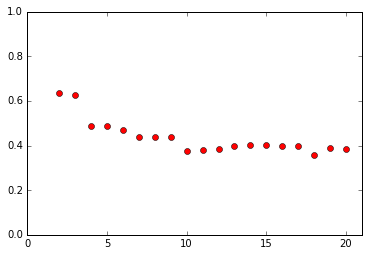

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [7]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
from sklearn import metrics

silhouette_scores = [] 
for n_cluster in range(2,21):
    np.random.seed(1)
    kmeans_clusters = KMeans(n_clusters=n_cluster)
    kmeans_clusters.fit(reduced_data)
    labels = kmeans_clusters.labels_
    score = metrics.silhouette_score(reduced_data, labels, metric='euclidean')
    silhouette_scores.append(score)
    
plt.plot(list(range(2,21)), silhouette_scores, 'ro')
plt.axis([0, 21, 0, 1])
plt.show()

kmeans_clusters_2 = KMeans(n_clusters=2)
kmeans_clusters_2.fit(reduced_data)
kmeans_clusters_3 = KMeans(n_clusters=3)
kmeans_clusters_3.fit(reduced_data)    

To decide the number of clusters, silhouette scores are calcuated by changing the number of clusters from 2 to 20. Silhouette scores are high if mean distance of intra clusters is low and mean distance of inter clusters is high. It is found that K-means clustering shows the best performance when the number of cluster is 2. However, it is not highly different compared to the evaluation scores of three clusters. Therefore, further analyses were conducted to decide the number of clusters.

In [8]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z_2 = kmeans_clusters_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_3 = kmeans_clusters_3.predict(np.c_[xx.ravel(), yy.ravel()])

In [9]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids_2 = np.round(kmeans_clusters_2.cluster_centers_, 2)
print centroids_2
centroids_3 = np.round(kmeans_clusters_3.cluster_centers_, 2)
print centroids_3

[[ 0.4  -0.04]
 [-3.88  0.35]]
[[  0.43  -0.03]
 [ -3.53   0.93]
 [ -4.51 -10.04]]


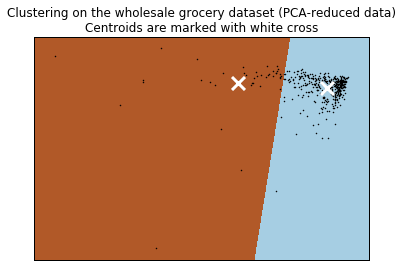

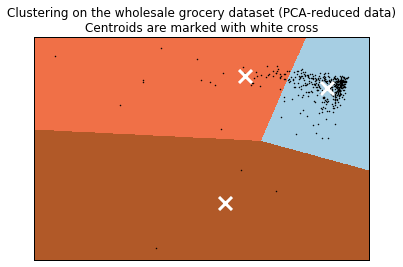

In [10]:
# Put the result into a color plot
Z_2 = Z_2.reshape(xx.shape)
Z_3 = Z_3.reshape(xx.shape)

plt.figure(1)
plt.clf()
plt.imshow(Z_2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

plt.figure(1)
plt.clf()
plt.imshow(Z_3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids_3[:, 0], centroids_3[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

By visualizing the results of K-means clusterings, I decided the number of cluster as 2. Increasing the number of cluster not only be able to improve the quality of clustering, but also make a weird cluster. The cluster only covers three points. That is, clustering with 3 clusters could suffer from overfitting. For these reasons, I would choose the cluser number as 2.

**7)** What are the central objects in each cluster? Describe them as customers.

In [11]:
original_centroid = np.dot(centroids_2, pca.components_[0:2,]) + pca.mean_
print data.columns.values
print original_centroid

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
[[ 0.0039637  -0.21472062 -0.23754607  0.00397567 -0.2296654  -0.07930451]
 [-0.0183865   2.0859504   2.29864551 -0.01533545  2.21805556  0.78841362]]


Answer: Central objects in each cluster show representative customer characteristics of each cluster. To get more sense for the customers, I transformed the PCA-reduced data into the original feature space.

From the original features of each centroid (see above.), we can easily find that two clusters show complete different characteristics. Second vector shows that the group of customers tends to buy more groceries, frozen foods, and detegrents papers rather than fresh and frozen products. On the other hand, the first group seems to prefer friesh and frozen products to the rest.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data? 

Answer: I find clustering is very useful to get insights from data. Cluster analysis lets met know that there exist completely different types of customers. One group tends to buy more groceries, frozen foods, and detergents papers while the other group is more likely to have fresh and frozen products. Knowing types of customers is important for companies to make a decision for customers. Non-technical people like marketing persons could utilize this customer type for their campaigns. The clustering results can vary according to parameter settings and samples used for the analysis, thus companies should be careful and do experiments many times in order to build types of customers.


**9)** How would you use that technique to help the company design new experiments?

Answer: The wholesale distributor had troubles in changing delivery methods. The initial testing did not return unsatisfactory results, but when new policy is applied, they got complaints from several customers. There might be several reasons for this phenomenon. Firstly, size of samples used for initial testing may be too small to represent all customers. Secondly, sample sizes could be large enough but they are only from one type of customers, who have similar purchasing patterns so have similar opinions for changes of delivery methods. In other words, samples could be biased hence the initial testing could fail to get opinions of all customers. 

By the virtue of findings on cluster analysis, we may design new experiments so as to measure reactions in an effective way. Cluster analysis finds two groups of customers. For each type of customer, the company could test changes of delivery methods separately. 

Testing the effects of delivery changes can be done through A/B tests. By sampling customers for each cluster, we then divide each of them in half. We only apply delivery changes to the half of sampled customers, and leave the other half with no changes on delivery methods. Finally, the company could figure out how customers from each cluster react to the changes differently. Because there can be biases to sample customers for A/B tests, the company should be careful to interpret results and conduct repeat experiments to make final decisions.

**10)** How would you use that data to help you predict future customer needs?

Answer: 
After finding clusters of customers, we could conduct a series of questionnaire surveys to figure out characteristics of customers on each cluster. For example, by sampling a subset of users of each cluster, the company could conduct surveys to ask them about their information that would be useful for the company, such as demographics and where they live. The information may help to build customer models for each type of customers. Such customer models help other teams such as marketing team to do their jobs.

Going further, we may try to predict the types (i.e., clusters) of unknown customers based on the information we got from the survey (e.g., demographics). Because we already have the knowledge on what types of users (e.g., demographics) are likely to belong to one of clusters and which type of products are more preferred by each cluster of customers, the company could predict customer needs in advance.